In [2]:
import graph
import pandas
import numpy
import matplotlib
%matplotlib inline

/Users/erinellefsen/PycharmProjects/Summer2015env/lib/python2.7/site-packages/pandas/io/excel.py:626: UserWarning: Installed openpyxl is not supported at this time. Use >=1.6.1 and <2.0.0.
  .format(openpyxl_compat.start_ver, openpyxl_compat.stop_ver))


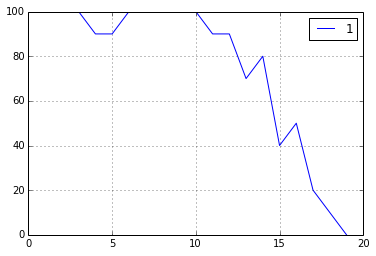

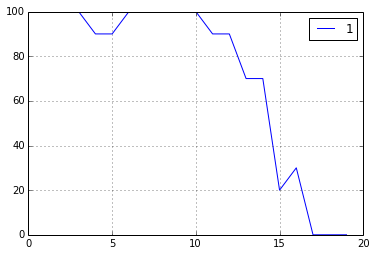

In [4]:
vaccinationpercent = 0
orderedpairlistHighEpi = []
orderedpairlistLowEpi = []
while vaccinationpercent < 1:
    trials = 10
    HighEpi = 0
    FinalEpi = 0
    for x in range(trials):

        g = graph.Graph(8, .9, 0, .02, vaccinationpercent)   #k,p,r,%infected,%vaccinated
        g.makeVertices(200)         #of people
        g.makebetterClusteredConnections(.01)         #prob they are connected
        g.update(50)            #number of repetitions, num trials
        if g.getHighEpi():
            HighEpi += 1
        if g.getFinalEpi():
            FinalEpi += 1
    
    orderedpairlistHighEpi = orderedpairlistHighEpi + [[vaccinationpercent,(float(HighEpi)/float(trials))*100]]
    orderedpairlistLowEpi = orderedpairlistLowEpi + [[vaccinationpercent, (float(FinalEpi)/float(trials))*100]]

    y = (vaccinationpercent,(float(HighEpi)/float(trials))*100 , (float(FinalEpi)/float(trials))*100)
    
    vaccinationpercent += .05

    
df = pandas.DataFrame(orderedpairlistHighEpi)
df1 = pandas.DataFrame(orderedpairlistLowEpi)
del df[0]
del df1[0]
df.plot()
df1.plot()